   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

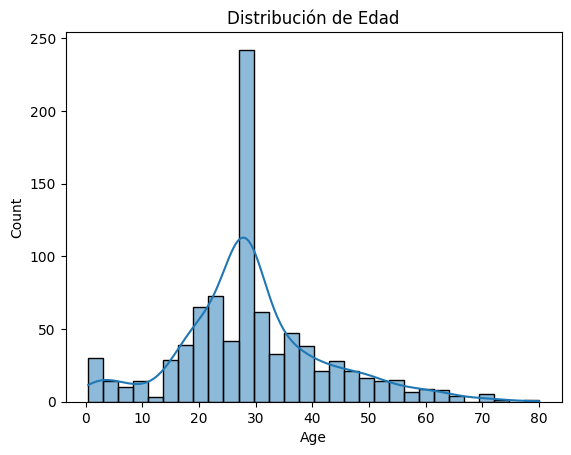

Valores atípicos detectados por desviación estándar: 7
Valores atípicos detectados por IQR: 66
Varianza manual: 169.32224856193795
Desviación estándar manual: 13.01238827279366
Varianza con NumPy: 169.32224856193815
Desviación estándar con NumPy: 13.012388272793666


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Carga del dataset
df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")

# Exploración inicial
print(df.head())  # Primeras filas
print(df.info())  # Información general
print(df.describe())  # Estadísticas básicas

# 2. Preprocesamiento de datos
# Manejo de valores nulos
numeric_columns = df.select_dtypes(include=['number']).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Codificación de variables categóricas
label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])

# Selección de características y variable objetivo
X = df[['Pclass', 'Age', 'Fare', 'Sex']]
y = df['Survived']

# Normalización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. Implementación de un modelo de Machine Learning
modelo = LogisticRegression()
modelo.fit(X_train, y_train)
y_pred = modelo.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy:.2f}')

# 4. Operaciones de Álgebra Lineal en Python
vector = np.array([2, 3, 4])
matriz = np.array([[1, 2], [3, 4]])
producto_punto = np.dot(vector, vector)
norma = np.linalg.norm(vector)

# Resolución de un sistema de ecuaciones lineales
A = np.array([[3, 2], [4, 1]])
b = np.array([5, 6])
solucion = np.linalg.solve(A, b)
print("Producto punto:", producto_punto)
print("Norma del vector:", norma)
print("Solución del sistema de ecuaciones:", solucion)

# 5. Análisis Estadístico de Datos
print("Media de la edad:", df['Age'].mean())
print("Mediana de la edad:", df['Age'].median())

# Visualización de datos
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Distribución de Edad")
plt.show()

# 6. Identificación de valores atípicos
std = df['Age'].std()
mean = df['Age'].mean()
outliers_std = df[(df['Age'] < mean - 3 * std) | (df['Age'] > mean + 3 * std)]
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = df[(df['Age'] < Q1 - 1.5 * IQR) | (df['Age'] > Q3 + 1.5 * IQR)]
print("Valores atípicos detectados por desviación estándar:", outliers_std.shape[0])
print("Valores atípicos detectados por IQR:", outliers_iqr.shape[0])

# 7. Implementación de funciones estadísticas personalizadas
def calcular_varianza(datos):
    media = sum(datos) / len(datos)
    return sum((x - media) ** 2 for x in datos) / len(datos)

def calcular_desviacion_estandar(datos):
    return calcular_varianza(datos) ** 0.5

# Aplicación en los datos
edades = df['Age'].dropna().tolist()
print("Varianza manual:", calcular_varianza(edades))
print("Desviación estándar manual:", calcular_desviacion_estandar(edades))
print("Varianza con NumPy:", np.var(edades))
print("Desviación estándar con NumPy:", np.std(edades))
